# 결정트리 : 의사결정나무
- 스무고개 게임, 노드를 따라 계속 내려감
- 가지가 많으면 과적합에 빠지기가 쉬움
- 직관적으로 이해하기 쉬운 알고리즘

In [5]:
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def main():
    # 데이터셋 로드
    cancer = datasets.load_breast_cancer()
    
    # 훈련, 테스트 데이터 선언
    x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                       cancer.target,
                                                       stratify = cancer.target,
                                                       test_size = 0.2,
                                                       random_state = 42)
    # 학습모델 선언                                                 
    cancer_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
    
    # 모델을 학습(3)
    cancer_model.fit(x_train, y_train)
    print('훈련점수: {:.3f}'.format(cancer_model.score(x_train, y_train)))
    print('테스트점수: {:.3f}'.format(cancer_model.score(x_test, y_test)))
    
    #DOT 언어의 형식으로 결정 나무의 형태를 출력
    with open('cancer-dtree.dot', mode = 'w') as f:
        tree.export_graphviz(cancer_model, out_file = f,
                            feature_names = cancer.feature_names,
                            class_names = ['cancer','not cancer'])
        
if __name__ == '__main__':
    main()

훈련점수: 0.967
테스트점수: 0.947


In [6]:
# 그래프비즈 설치
!pip install graphviz

### 위스콘신 주립대학에서 제공하는 유방암 진단 데이터셋

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

#### SVM 알고리즘으로 분석하기

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [22]:
# 유방암 데이터 호출

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [12]:
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

malignant.shape, benign.shape

((212, 30), (357, 30))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [16]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [18]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

display(train_score, test_score)

0.9084507042253521

0.8951048951048951

In [19]:
predict_y = model.predict(X_test)
predict_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

Text(0, 0.5, 'scale')

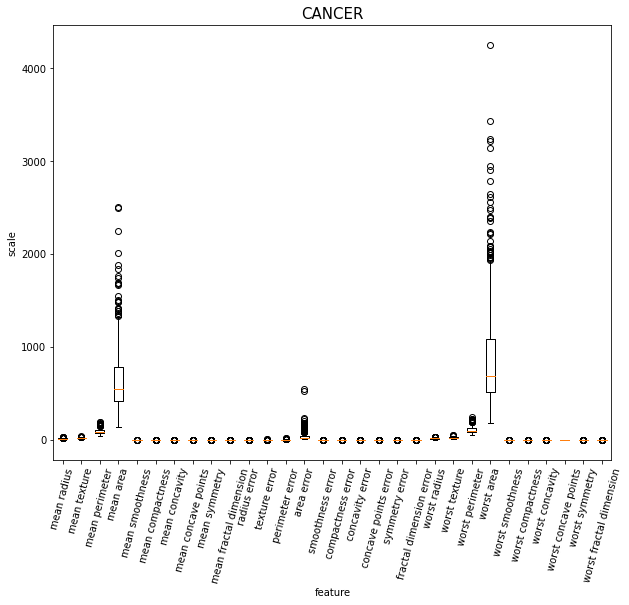

In [21]:
fig = plt.figure(figsize=(10,8))
plt.title('CANCER', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=75)
plt.xlabel('feature')
plt.ylabel('scale')

# Decision Tree 알고리즘으로 분석하기

In [24]:
import pandas as pd
import numpy as np

### 1단계 : 데이터 준비

In [25]:
# uci 사이트에서 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(uci_path, header=None)

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### 속성 정보

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3-32)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

In [30]:
# 열이름 지정

df.columns = ['id','clump','cell_size','cell_shape','adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nuclei','mitoses','class']

In [31]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nuclei,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 2단계 : 데이터 탐색

In [32]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             699 non-null    int64 
 1   clump          699 non-null    int64 
 2   cell_size      699 non-null    int64 
 3   cell_shape     699 non-null    int64 
 4   adhesion       699 non-null    int64 
 5   epithlial      699 non-null    int64 
 6   bare_nuclei    699 non-null    object
 7   chromatin      699 non-null    int64 
 8   normal_nuclei  699 non-null    int64 
 9   mitoses        699 non-null    int64 
 10  class          699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


#### bare_nuclei 숫자형으로 변환해준다
- 그전에 '?' 데이터를 처리

In [41]:
# bare_nuclei 필드의 자료형을 변경 (문자열 -> 정수형)

# bare_nuclei 열의 고유값 확인
print(df['bare_nuclei'].unique())
# ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']

# ? 기호를 nan값으로 변경
df['bare_nuclei'].replace('?',np.nan, inplace=True)

# 누락 데이터 행을 삭제
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)

# 문자형을 정수형으로 변환
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

# 정보 확인
df.describe()

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nuclei,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### 3단계 : 데이터 분류(훈련용 / 테스트용)

In [42]:
# 설명 변수를 X로 지정 : 훈련용 데이터
X = df[['id','clump','cell_size','cell_shape','adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nuclei','mitoses','class']]

# 예측 변수를 y로 지정 : 테스트용 데이터
y = df['class']

In [45]:
# 설명 변수 데이터를 정규화 
# 머신러닝을 위해 데이터들을 0과 1사이의 값으로 바꿔줌
# 정규화 공식 = 값 / 전체값의 카운트 수

from sklearn import preprocessing

# 정규화해주는 착한 함수
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X)

[[-0.12366418  0.19790469 -0.70221201 ... -0.61292736 -0.34839971
  -0.73368133]
 [-0.11895594  0.19790469  0.27725185 ... -0.28510482 -0.34839971
  -0.73368133]
 [-0.09883306 -0.51164337 -0.70221201 ... -0.61292736 -0.34839971
  -0.73368133]
 ...
 [-0.30297227  0.19790469  2.23617957 ...  2.33747554  0.22916583
   1.36298958]
 [-0.2890233  -0.15686934  1.58320366 ...  1.02618536 -0.34839971
   1.36298958]
 [-0.2890233  -0.15686934  1.58320366 ...  0.37054027 -0.34839971
   1.36298958]]


In [47]:
# 훈련용 / 테스트용 데이터 7:3 비율로 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # 랜덤스테이트 10번 섞어라

print('train_data 개수 : ', X_train.shape)
print('test_data 개수 : ', X_test.shape)

train_data 개수 :  (478, 11)
test_data 개수 :  (205, 11)


### 4단계 : 모델링 (Decision Tree)

In [51]:
# 결정트리 분류 모델 호출하기

from sklearn import tree

In [57]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', # entropy : 각각의 분기점에서 최적의 속성을 찾는다.
                                        max_depth = 5) # max_depth : 5단계의 나무 (주로 홀수로)

In [58]:
# 학습

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [61]:
# 예측 2(benign : 양성), 4(malignant : 악성)

y_hat = tree_model.predict(X_test)

print('예측값 : ', y_hat[0:10])
print()
print('정답   : ', y_test.values[0:10])

예측값 :  [4 4 4 4 4 4 2 2 4 4]

정답   :  [4 4 4 4 4 4 2 2 4 4]


In [62]:
# 성능 평가 : Confusion Matrix 계산

from sklearn import metrics

tree_matrix = metrics.confusion_matrix(y_test, y_hat)

tree_matrix

array([[131,   0],
       [  0,  74]], dtype=int64)

- TP(양성을 제대로 예측한) : 131개
- FN(양성을 악성으로 잘못 예측한) : 0개
- FP(악성을 양성으로 잘못 예측한) : 0개
- TN(악성을 제대로 예측한) : 74개

In [63]:
# 보고서, 평가지표 계산

tree_report = metrics.classification_report(y_test, y_hat)

print(tree_report)

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       131
           4       1.00      1.00      1.00        74

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

